# 통계기반의 데이터 분석 실무 : Scikit-learn

### 담당교수 : 장원중

#### 그래프 한글이 깨질때 & 마이너스 부호 사용

In [1]:
import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [1]:
# 운영체제별 이름 

import platform

platform.system()

'Windows'

# Scikit-learn 

## sciket-learn 유방암 진단 데이터셋 객체  

In [63]:
# 유방암 진단 데이터셋 읽어오기 

from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()      
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [64]:
# 종속 변수 이름, 독립 변수 이름 출력 
print(cancer.target_names)   
print(cancer.feature_names)   

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [65]:
# 유방암 진단 데이터 셋을 데이터프레임을 생성

cancer_feature = pd.DataFrame(cancer.data, columns=cancer.feature_names) # 독립변수 
cancer_target = pd.Series(cancer.target, dtype="category")               # 종속변수  
cancer_target = cancer_target.cat.rename_categories(cancer.target_names) # 종속변수 속성의 값을 target_names으로 변경  
df_cancer = pd.concat([cancer_feature, cancer_target], axis=1)           # 열로 병합  
df_cancer.rename({0:"target"}, axis=1, inplace=True)                     # target: 양성(benign), 악성(malignant)
print(df_cancer.shape)       # (569, 31) 
df_cancer

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [4]:
# 다음은 각 30개의 변수(feature) 출력  
for i,feature in enumerate(cancer.feature_names):
  print(f'feature{(i+1)} : ',feature)

feature1 :  mean radius
feature2 :  mean texture
feature3 :  mean perimeter
feature4 :  mean area
feature5 :  mean smoothness
feature6 :  mean compactness
feature7 :  mean concavity
feature8 :  mean concave points
feature9 :  mean symmetry
feature10 :  mean fractal dimension
feature11 :  radius error
feature12 :  texture error
feature13 :  perimeter error
feature14 :  area error
feature15 :  smoothness error
feature16 :  compactness error
feature17 :  concavity error
feature18 :  concave points error
feature19 :  symmetry error
feature20 :  fractal dimension error
feature21 :  worst radius
feature22 :  worst texture
feature23 :  worst perimeter
feature24 :  worst area
feature25 :  worst smoothness
feature26 :  worst compactness
feature27 :  worst concavity
feature28 :  worst concave points
feature29 :  worst symmetry
feature30 :  worst fractal dimension


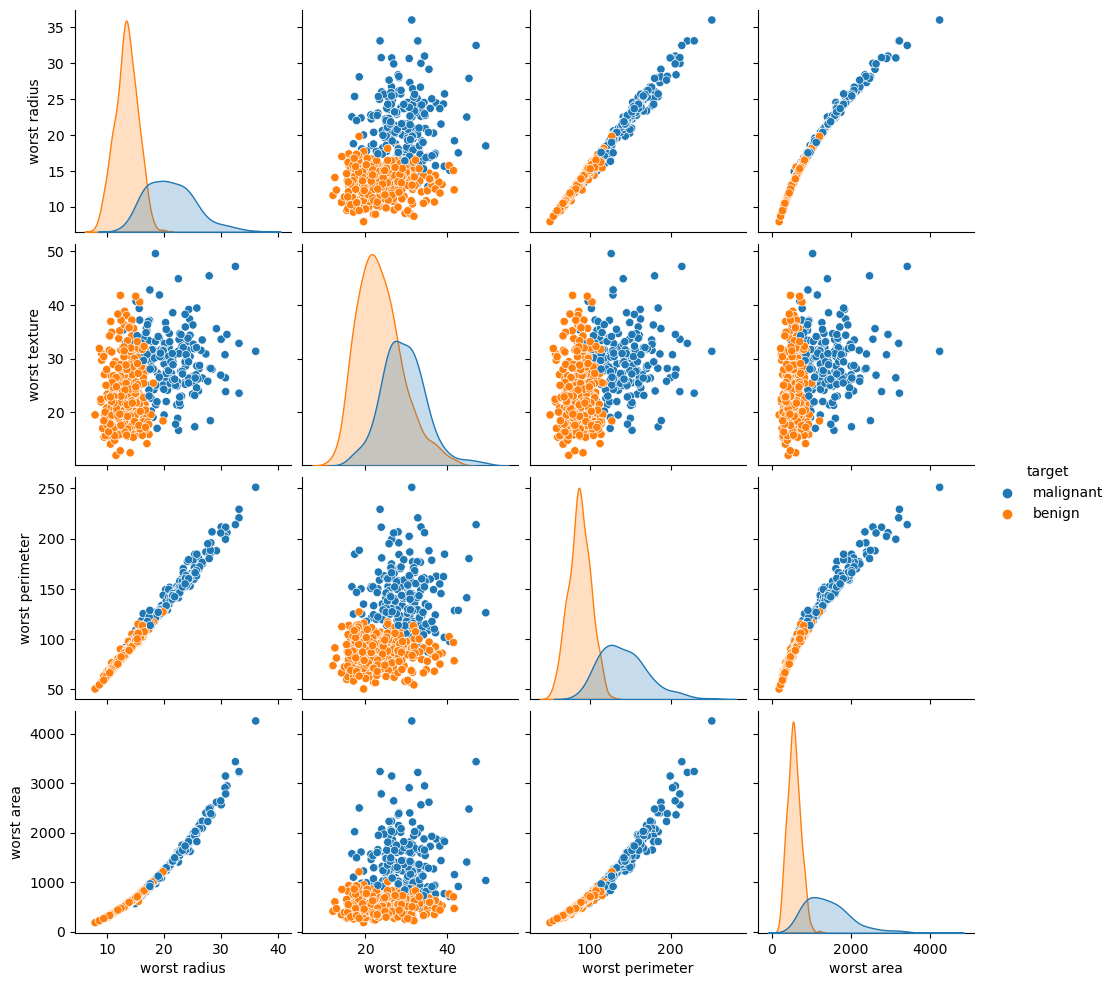

In [66]:
# 일부 특징값으로 분포와 상관관계 및 산점도를 그림  
# - 독립 변수: "worst radius", "worst texture", "worst perimeter", "worst area"

sns.pairplot(vars=["worst radius", "worst texture", "worst perimeter", "worst area"], 
                hue="target", data=df_cancer)
plt.show()

In [45]:
# 상관계수 
# - 독립 변수: "worst radius", "worst texture", "worst perimeter", "worst area"
print(df_cancer.loc[:,["worst radius", "worst texture", "worst perimeter", "worst area"]].corr())

                 worst radius  worst texture  worst perimeter  worst area
worst radius         1.000000       0.359921         0.993708    0.984015
worst texture        0.359921       1.000000         0.365098    0.345842
worst perimeter      0.993708       0.365098         1.000000    0.977578
worst area           0.984015       0.345842         0.977578    1.000000


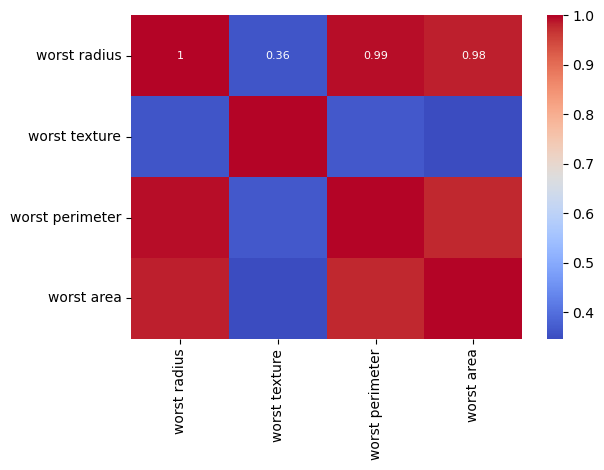

In [48]:
# 히트맵 
# - 독립 변수: "worst radius", "worst texture", "worst perimeter", "worst area"

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_cancer.loc[:,["worst radius", "worst texture", "worst perimeter", "worst area"]].corr(), 
            cmap="coolwarm", annot=True, annot_kws={"fontsize":8})
plt.tight_layout()
plt.show()

In [49]:
# 빈도 출력 함수 : (key: 리스트요소, value: 빈도수)로 이루어진 딕셔너리 생성

import operator
from operator import itemgetter, attrgetter

def count_frequency(x_list):
    count = {}
    for item in x_list:
        count[item] = count.get(item, 0) + 1

    # 내림차순: 빈도수 높은 순으로 정렬
    sorted_count = sorted(count.items(), key = operator.itemgetter(1), reverse = True)         
       
    return sorted_count

In [50]:
count_frequency(df_cancer.target)   # target : 양성(benign), 악성(malignant)
# [('benign', 357), ('malignant', 212)]

[('benign', 357), ('malignant', 212)]

In [51]:
df_cancer.target.value_counts()
# benign       357
# malignant    212
# Name: target, dtype: int64

benign       357
malignant    212
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

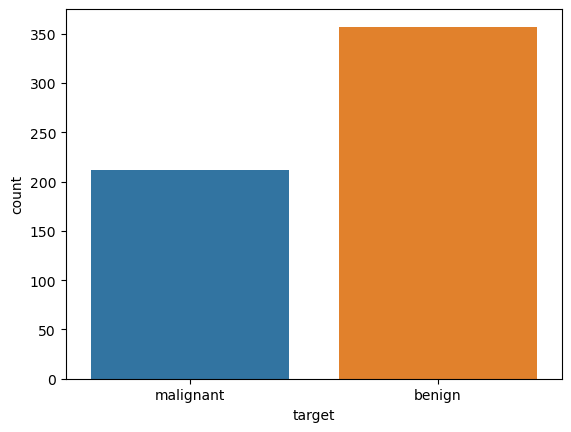

In [52]:
import seaborn as sns 

#  dataset 전체의 target 속성 빈도수 
sns.countplot(x='target', data=df_cancer)

In [12]:
# 훈련 데이터 70%, 테스트 데이터 30% 

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # (426, 30) (143, 30) (426,) (143,) 

In [53]:
# 훈련 데이터 70%, 테스트 데이터 30% 

#  scikit-learn model_selection 모듈은 train_test_split 함수로 X_train, X_test, y_train, y_test 데이터셋을 분할

# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None,)
#  - stratify : 층 구분 변수이름을 입력, 이때 각 층(stratum, group) 별로 나누어서 test_size 비율을 적용해서 추출 
#  - test_size : test set의 비율 
#  - shuffle=True : 무작위 추출(random sampling) / shuffle=False : 체계적 추출(systematic sampling) 
#  - random_state : 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    test_size=0.3, 
                                                    shuffle=True,             # shuffle=True : 무작위 추출(random sampling)
                                                    stratify=cancer.target,   # stratify : 층 구분 변수이름 
                                                    random_state=1234)        # 데이터셋 분할결과를 반환 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(count_frequency(y_train))
print(count_frequency(y_test))

(398, 30) (171, 30) (398,) (171,)
[(1, 250), (0, 148)]
[(1, 107), (0, 64)]


In [72]:
# StratifiedShuffleSplit() 클래스 : 
# 모집단을 여러개의 층으로 구분하여, 각 층에서 n개씩 랜덤하게 추출하는 방법 
#  - 순수한 무작위 샘플링 방식은 데이터의 크기가 충분히 크지 않은 상황 등 샘플링 편향이 발생할 수 있는 가능성이 생길수 있다. 
#  - 전체 데이터를 계층별 그룹으로 나눈뒤. 테스트 세트가 전체 데이터의 각 계층의 계수 비율 만큼 샘플링 한다.

# 사이킷 런 계층적 샘플링 - sklearn.model_selection.StratifiedShuffleSplit
#  - StratifiedShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None) 
#                           n_splits : 분리할 데이터 셋의 개수를 지정 
#                           test_size : 테스트 셋의 비율을 지정 
#                           train_size : 훈련 셋의 비율을 지정 
#                           random_state : 생성된 훈련 및 데스트 셋 난수를 지정 

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sfld = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
cv_accuracy=[]           # CV별 정확도 저장 
n_iter = 0               # 반복횟수 

for train_index, test_index in sfld.split(df_cancer.iloc[:,:-1],df_cancer['target']):
    print(train_index.shape, test_index.shape)
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train = cancer_feature.iloc[train_index] 
    X_test = cancer_feature.iloc[test_index]

    y_train = df_cancer['target'].iloc[train_index]
    y_test = df_cancer['target'].iloc[test_index]

    n_iter += 1          # 반복횟수 
        
    label_train = df_cancer['target'].iloc[train_index]
    label_test = df_cancer['target'].iloc[test_index]
    print("n_iter=",n_iter,"\n",count_frequency(label_train), count_frequency(label_test))  
    print('------------------------------------------------------------------------------')

(398,) (171,)
n_iter= 1 
 [('benign', 250), ('malignant', 148)] [('benign', 107), ('malignant', 64)]
------------------------------------------------------------------------------


## estimate

In [73]:
# Estimator 객체 및 하이퍼파라미터 설정
# - 의사결정나무 모델 생성 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy')

## fit

In [74]:
model.fit(X_train, y_train)        # fit 메서드를 이용한 학습    

DecisionTreeClassifier(criterion='entropy')

## predict

In [81]:
# 모델의 예측 결과 반환  
# - target : 양성(benign), 악성(malignant)

y_pred = model.predict(X_test)     # 모델의 예측 결과 반환  
print(count_frequency(y_pred))
print(y_pred[:5])

[('benign', 101), ('malignant', 70)]
['benign' 'benign' 'benign' 'malignant' 'benign']


In [82]:
# 모델 성능 평가

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
# 94%의 정확도를 가지는 것을 확인할 수 있음 

Accuracy: 0.9415204678362573
Confusion Matrix:
[[99  8]
 [ 2 62]]
Classification Report:
              precision    recall  f1-score   support

      benign       0.98      0.93      0.95       107
   malignant       0.89      0.97      0.93        64

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171



## transform 

In [83]:
# 표준화 함수 StandardScaler를 이용해 transform() 메서드를 사용함  

from sklearn.preprocessing import StandardScaler

# 전처리하기 전 출력   
print(X_train.shape)
print(X_train[:2])
print('-' * 70)

# 전처리 - 스케일링 적용
scaler = StandardScaler()           # 객체 생성 
scaler.fit(X_train)                 # 학습
X_train_ss = scaler.transform(X_train) # 변환 
X_test_ss = scaler.transform(X_test)   # 변환 

# 전처리후 결과 확인
print(X_train_ss.shape)
print(X_train_ss[:2])

(398, 30)
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
436        12.87         19.54           82.67      509.2          0.09136   
181        21.09         26.57          142.70     1311.0          0.11410   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
436           0.07883         0.01797               0.0209         0.1861   
181           0.28320         0.24870               0.1496         0.2395   

     mean fractal dimension  ...  worst radius  worst texture  \
436                 0.06347  ...         14.45          24.38   
181                 0.07398  ...         26.68          33.48   

     worst perimeter  worst area  worst smoothness  worst compactness  \
436            95.14       626.9            0.1214             0.1652   
181           176.50      2089.0            0.1491             0.7584   

     worst concavity  worst concave points  worst symmetry  \
436          0.07127               0.06384   

## fit_transform 예제

In [84]:
# 표준화 함수 StandardScaler를 이용해 transform() 메서드를 사용함  

from sklearn.preprocessing import StandardScaler

# 전처리하기 전 춗력
print(X_train.shape)
print(X_train[:2])
print('-' * 70)

# 전처리 - 스케일링 적용
X_train_ss = StandardScaler().fit_transform(X_train)

# 전처리후 결과 확인
print(X_train_ss.shape)
print(X_train_ss)

(398, 30)
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
436        12.87         19.54           82.67      509.2          0.09136   
181        21.09         26.57          142.70     1311.0          0.11410   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
436           0.07883         0.01797               0.0209         0.1861   
181           0.28320         0.24870               0.1496         0.2395   

     mean fractal dimension  ...  worst radius  worst texture  \
436                 0.06347  ...         14.45          24.38   
181                 0.07398  ...         26.68          33.48   

     worst perimeter  worst area  worst smoothness  worst compactness  \
436            95.14       626.9            0.1214             0.1652   
181           176.50      2089.0            0.1491             0.7584   

     worst concavity  worst concave points  worst symmetry  \
436          0.07127               0.06384   